[[567. 464.]
 [587. 447.]
 [609. 427.]
 [628. 412.]
 [641. 397.]
 [664. 382.]
 [686. 350.]]
lArrayNeg:  [1.06185811 1.06574018 1.06634325 1.06812298 1.06909709 1.07068267
 1.07150267 1.07390016 1.0740075  1.07491783 1.07300086 1.0723225
 1.07193874 1.07198335 1.07156323 1.06949429 1.06680461 1.06543431
 1.06119824 1.05855144 1.05445321 1.05141197 1.04527732 1.04189817
 1.03836865 1.03593    1.0320335  1.02674373 1.03280826 1.02574101
 1.02557211 1.0289972  1.0375375  1.02807985 1.02688269]
rArrayNeg:  [0.04020391 0.04558217 0.04968932 0.0538525  0.05799156 0.06217834
 0.06631104 0.07056974 0.0758401  0.07884502 0.08281131 0.08800913
 0.09090719 0.09615628 0.09904527 0.10408361 0.10789746 0.11066529
 0.11540797 0.11916112 0.12269414 0.1263497  0.12959888 0.13311929
 0.13662378 0.14021679 0.14361596 0.14678603 0.15154721 0.15440754
 0.15935954 0.16267842 0.1690581  0.17141377 0.17398968]
xiPrimeNegarray [-17.28188265 -16.38157906 -14.82407971 -13.70476405 -12.4715436
 -11.46763506 -10.36

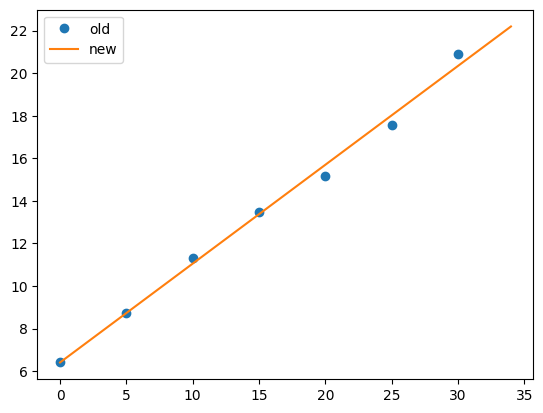

<Figure size 640x480 with 0 Axes>

In [13]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]

    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayPos[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]
    
    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayNeg[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayNeg[i] = l









# for i in range(35):
#     surplus = (i - 5*(i // 5))/5

#     lArrayNegNew[i] = lArrayNeg[i//5]*(1 - surplus) + lArrayNeg[i//5 + 1]*(surplus)
#     lArrayPosNew[i] = lArrayPos[i//5]*(1 - surplus) + lArrayPos[i//5 + 1]*(surplus)
print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


xiPrimeNegArray:  [-17.28188265 -16.38157906 -14.82407971 -13.70476405 -12.4715436
 -11.46763506 -10.36026128  -9.64951012  -8.40010016  -7.59526089
  -6.20024237  -5.0072034   -4.11371777  -3.14869261  -2.32488401
  -1.10874719   0.06637711   0.92124128   2.30344125   3.33607481
   4.52568251   5.53311832   6.90570107   7.87854711   8.84077387
   9.64051791  10.5919096   11.67645299  11.45106484  12.69261057
  13.20857354  13.23949337  12.87618952  14.27446037  14.77687922]
xiPrimePosArray:  [34.43474636 35.02599614 34.83614005 35.08369564 35.21807204 35.58236252
 35.84126778 36.49862158 36.74070442 37.17878048 37.15222096 37.45063209
 37.80002852 38.32646922 38.74555431 39.02089575 39.21434148 39.60234195
 39.71158706 40.04772057 40.22368054 40.58492761 40.58127095 40.97377892
 41.38039378 41.94611307 42.3634866  42.64791687 44.23858799 44.36593986
 45.34136125 46.55326816 48.4079713  48.37867234 49.11906113]
d:  0.16605489813117646
l:  1.061858109076319
r:  0.0402039149950303
epsilo

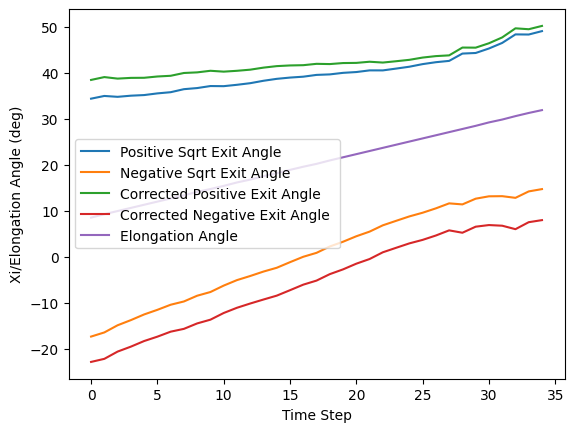

In [19]:
def trueXi(l, r, xiPrime, epsilon):
    

    d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    sol = fsolve(func, xiPrime)

    print("d: ", d)
    print("l: ", l)
    print("r: ", r)
    print("epsilon: ", epsilon)
    print("xiPrime: "   , xiPrime)
    print("func(sol) = " , func(sol))
    print("xi: ", sol)
    if(xiPrime == sol):
        return np.nan
    return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], xiPrimeNegArray[i], epsilonArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], xiPrimePosArray[i], epsilonArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)
fig, axs = plt.subplots()   
axs.plot(xiPrimePosArray, label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(xiPrimeNegArray, label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(xiPosarray, label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(xiNegarray, label='Corrected Negative Exit Angle', linestyle='solid', color='orange')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='center left') 
plt.show()

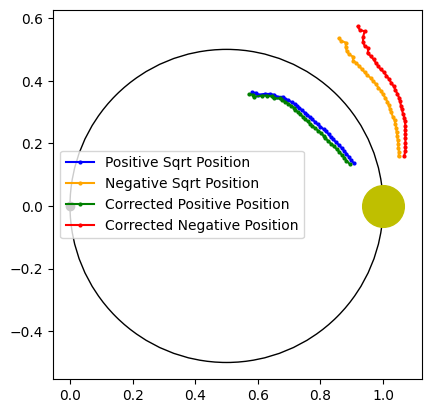

In [15]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


axs = plt.subplot()
axs.plot(0,0, 'ko')
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)


axs.plot(posPositionArray[:,0],posPositionArray[:,1],color='blue', marker="o", label='Positive Sqrt Position', markersize=2)
axs.plot(negPositionArray[:,0],negPositionArray[:,1],color='orange', marker="o", label='Negative Sqrt Position', markersize=2)
axs.plot(posPositionArrayAdj[:,0],posPositionArrayAdj[:,1],color='green', marker="o", label='Corrected Positive Position', markersize=2)
axs.plot(negPositionArrayAdj[:,0],negPositionArrayAdj[:,1],color='red', marker="o", label='Corrected Negative Position', markersize=2)


thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.legend()
plt.show()


In [18]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(xiPosarray))
print("pos sigma:", np.std(xiPosarray))



negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(xiNegarray[:maxImages]))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.20187207835189686
pos b:  38.45446508562436
pos mean:  42.44497824291818
pos sigma: 3.144553127653571
neg m:  1.0465242311584235
neg b:  -22.73677159242104
neg mean:  -12.79479139641602
neg sigma: 6.037909370500589
